Import requisite packages

In [1]:
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

API Call to Census Data to Gather Demograrphic Data

In [2]:
host = 'https://api.census.gov/data'
year = '/2019'
dataset_acronym = '/acs/acs5'
g = '?get='
variables1 = 'B01001_001E,B01001_003E,B01001_004E,B01001_027E,B01001_028E'
variables2 = 'B05002_001E,B05002_002E,B05002_013E,B05002_014E,B05002_021E'
variables4 = 'B02001_001E,B02001_002E,B02001_003E,B02001_004E,B02001_005E,B02001_006E,B02001_007E,B02001_008E,B03001_003E'
variables5 = 'B25001_001E,B25002_002E,B25003_002E,B25003_003E,B25002_003E,B25034_011E,B25034_010E,B25034_009E,B25034_008E,B25034_007E'
variables6 = 'B19001_001E,B19001_002E,B19001_003E,B19001_004E,B19001_005E,B19001_006E,B19001_007E,B19001_008E'
location = '&for=zip%20code%20tabulation%20area:*&in=state:36'
usr_key = '&key=657170b4657af956747282b95cfa61cff239b1ec'

query_url1 = f"{host}{year}{dataset_acronym}{g}{variables1}{location}{usr_key}"
r1 = requests.get(query_url1).json()

query_url2 = f"{host}{year}{dataset_acronym}{g}{variables2}{location}{usr_key}"
r2 = requests.get(query_url2).json()

query_url4 = f"{host}{year}{dataset_acronym}{g}{variables4}{location}{usr_key}"
r4 = requests.get(query_url4).json()

query_url5 = f"{host}{year}{dataset_acronym}{g}{variables5}{location}{usr_key}"
r5 = requests.get(query_url5).json()

query_url6 = f"{host}{year}{dataset_acronym}{g}{variables6}{location}{usr_key}"
r6 = requests.get(query_url6).json()

Put received race/ethnicity data to dataframe and calculate percentages

In [3]:
df1 = pd.DataFrame(r1)
df1.columns = df1.iloc[0]
df1 = df1.drop(df1.index[0])
df1 = df1.rename(columns={'B01001_001E': 'AGE_TotalPop',
                          'B01001_003E': 'AGE_Male<5',
                          'B01001_004E': 'AGE_Male5-9',
                          'B01001_027E': 'AGE_Female<5',
                          'B01001_028E': 'AGE_Female5-9',
                          'state': 'State',
                          'zip code tabulation area': 'ZIP Code'
                         })
df1_numeric_cols = ['AGE_TotalPop',
                    'AGE_Male<5',
                    'AGE_Male5-9',
                    'AGE_Female<5',
                    'AGE_Female5-9']
df1[df1_numeric_cols] = df1[df1_numeric_cols].apply(pd.to_numeric, errors='coerce')
df1['AGE_Pop<5'] = (df1['AGE_Male<5'] + df1['AGE_Female<5'])
df1['AGE_Pop5-9'] = (df1['AGE_Male5-9'] + df1['AGE_Female5-9']) 
df1['AGE_%<5'] = df1['AGE_Pop<5'] / df1['AGE_TotalPop']
df1['AGE_%5-9'] = df1['AGE_Pop5-9'] / df1['AGE_TotalPop']

df2 = pd.DataFrame(r2)
df2.columns = df2.iloc[0]
df2 = df2.drop(df2.index[0])
df2 = df2.rename(columns={'B05002_001E': 'CIT_TotalPop',
                          'B05002_002E': 'CIT_NativeBorn',
                          'B05002_013E': 'CIT_ForeignBorn',
                          'B05002_014E': 'CIT_ForeignBornNat',
                          'B05002_021E': 'CIT_ForeignBornNoCit',
                          'state': 'State',
                          'zip code tabulation area': 'ZIP Code'
                         })
df2_numeric_cols = ['CIT_TotalPop',
                    'CIT_NativeBorn',
                    'CIT_ForeignBorn',
                    'CIT_ForeignBornNat',
                    'CIT_ForeignBornNoCit']
df2[df2_numeric_cols] = df2[df2_numeric_cols].apply(pd.to_numeric, errors='coerce')
df2['CIT_%NativeBorn'] = df2['CIT_NativeBorn'] / df2['CIT_TotalPop']
df2['CIT_%ForeignBornNatCit'] = df2['CIT_ForeignBornNat'] / df2['CIT_TotalPop']
df2['CIT_%ForeignBornNoCit'] = df2['CIT_ForeignBornNoCit'] / df2['CIT_TotalPop']

df4 = pd.DataFrame(r4)
df4.columns = df4.iloc[0]
df4 = df4.drop(df4.index[0])
df4 = df4.rename(columns={'B02001_001E': 'RACE_TotalPop',
                          'B02001_002E': 'RACE_White',
                          'B02001_003E': 'RACE_Black',
                          'B02001_004E': 'RACE_AI/AN',
                          'B02001_005E': 'RACE_Asian',
                          'B02001_006E': 'RACE_NH/PI',
                          'B02001_007E': 'RACE_Other',
                          'B02001_008E': 'RACE_Two or More',
                          'B03001_003E': 'ETHN_Hispanic or Latino',
                          'state': 'State',
                          'zip code tabulation area': 'ZIP Code'
                         })
df4_numeric_cols = ['RACE_TotalPop',
                    'RACE_White',
                    'RACE_Black',
                    'RACE_AI/AN',
                    'RACE_Asian',
                    'RACE_NH/PI',
                    'RACE_Other',
                    'RACE_Two or More',
                    'ETHN_Hispanic or Latino']
df4[df4_numeric_cols] = df4[df4_numeric_cols].apply(pd.to_numeric, errors='coerce')
# The below add columns to the dataframe that calculate the percentage of each ZIP Code comprising each category
df4['RACE_%White'] = df4['RACE_White'] / df4['RACE_TotalPop']
df4['RACE_%Black'] = df4['RACE_Black'] / df4['RACE_TotalPop']
df4['RACE_%AI/AN'] = df4['RACE_AI/AN'] / df4['RACE_TotalPop']
df4['RACE_%Asian'] = df4['RACE_Asian'] / df4['RACE_TotalPop']
df4['RACE_%NH/PI'] = df4['RACE_NH/PI'] / df4['RACE_TotalPop']
df4['RACE_%Other'] = df4['RACE_Other'] / df4['RACE_TotalPop']
df4['RACE_%Two or More'] = df4['RACE_Two or More'] / df4['RACE_TotalPop']
# Latino or Hispanic are Ethnicities as a distinct category from Races; the Hispanic population is dispersed
# throughout categories of race
df4['ETHN_%Hispanic or Latino'] = df4['ETHN_Hispanic or Latino'] / df4['RACE_TotalPop']

df5 = pd.DataFrame(r5)
df5.columns = df5.iloc[0]
df5 = df5.drop(df5.index[0])
df5 = df5.rename(columns={'B25001_001E':'HOUS_TotalUnits',
                          'B25002_002E':'HOUS_OccupiedUnits',
                          'B25003_002E':'HOUS_OwnerOccupied',
                          'B25003_003E':'HOUS_RenterOccupied',
                          'B25002_003E':'HOUS_VacantUnits',
                          'B25034_011E':'HOUS_UnitsPre1940',
                          'B25034_010E':'HOUS_Units1940-49',
                          'B25034_009E':'HOUS_Units1950-59',
                          'B25034_008E':'HOUS_Units1960-69',
                          'B25034_007E':'HOUS_Units1970-79',
                          'state':'State',
                          'zip code tabulation area':'ZIP Code'
                         })
df5_numeric_cols = ['HOUS_TotalUnits',
                    'HOUS_OccupiedUnits',
                    'HOUS_OwnerOccupied',
                    'HOUS_RenterOccupied',
                    'HOUS_VacantUnits',
                    'HOUS_UnitsPre1940',
                    'HOUS_Units1940-49',
                    'HOUS_Units1950-59',
                    'HOUS_Units1960-69',
                    'HOUS_Units1970-79']
df5[df5_numeric_cols] = df5[df5_numeric_cols].apply(pd.to_numeric, errors='coerce')
df5['HOUS_%UnitsOwnerOccupied'] = df5['HOUS_OwnerOccupied'] / df5['HOUS_TotalUnits']
df5['HOUS_%UnitsRenterOccupied'] = df5['HOUS_RenterOccupied'] / df5['HOUS_TotalUnits']
df5['HOUS_%UnitsVacant'] = df5['HOUS_VacantUnits'] / df5['HOUS_TotalUnits']
df5['HOUS_%Pre1940Units'] = df5['HOUS_UnitsPre1940'] / df5['HOUS_TotalUnits']
# This formula adds the years between 1940 to 1970 and then accounts for 80% of the next decade to calculate
# pre-1978 units. While seemingly wonky, this calculation is generally accepted in government grant applications.
df5['HOUS_%Pre1978Units'] = (df5['HOUS_UnitsPre1940'] + 
                             df5['HOUS_Units1950-59'] + 
                             df5['HOUS_Units1960-69'] + 
                             (df5['HOUS_Units1970-79'])*.8) / df5['HOUS_TotalUnits']

df6 = pd.DataFrame(r6)
df6.columns = df6.iloc[0]
df6 = df6.drop(df6.index[0])
df6 = df6.rename(columns={'B19001_001E':'ECON_TotalHouseholds',
                          'B19001_002E':'ECON_<$10,000',
                          'B19001_003E':'ECON_10,000-14,999',
                          'B19001_004E':'ECON_15,000-19,999',
                          'B19001_005E':'ECON_20,000-24,999',
                          'B19001_006E':'ECON_25,000-29,999',
                          'B19001_007E':'ECON_30,000-34,999',
                          'B19001_008E':'ECON_35,000-39,999',
                          'state':'State',
                          'zip code tabulation area':'ZIP Code'
                         })
df6_numeric_cols = ['ECON_TotalHouseholds',
                    'ECON_<$10,000',
                    'ECON_10,000-14,999',
                    'ECON_15,000-19,999',
                    'ECON_20,000-24,999',
                    'ECON_25,000-29,999',
                    'ECON_30,000-34,999',
                    'ECON_35,000-39,999']
df6[df6_numeric_cols] = df6[df6_numeric_cols].apply(pd.to_numeric, errors='coerce')
df6['ECON_%<10K'] = df6['ECON_<$10,000'] / df6['ECON_TotalHouseholds']
df6['ECON_%<25K'] = (df6['ECON_<$10,000'] +
                     df6['ECON_10,000-14,999'] + 
                     df6['ECON_15,000-19,999'] + 
                     df6['ECON_20,000-24,999']) / df6['ECON_TotalHouseholds']
df6['ECON_%<40K'] = (df6['ECON_<$10,000'] +
                     df6['ECON_10,000-14,999'] + 
                     df6['ECON_15,000-19,999'] + 
                     df6['ECON_20,000-24,999'] +
                     df6['ECON_25,000-29,999'] +
                     df6['ECON_30,000-34,999'] +
                     df6['ECON_35,000-39,999']) / df6['ECON_TotalHouseholds']
df6['ECON_%10K-25K'] = (df6['ECON_10,000-14,999'] + 
                        df6['ECON_15,000-19,999'] + 
                        df6['ECON_20,000-24,999']) / df6['ECON_TotalHouseholds']
df6['ECON_%25K-40K'] = (df6['ECON_25,000-29,999'] +
                        df6['ECON_30,000-34,999'] +
                        df6['ECON_35,000-39,999']) / df6['ECON_TotalHouseholds']

Merge percentages only into a dataframe based on ZIP Code. Note, some of these ZIP Codes are universities, large business complexes, and prisons - this will not matter when the table is merged again with the EBLL dataset, which should not contain most of the rows with null values.

In [4]:
df_1_2_merge = df1.merge(df2,how='inner',on='ZIP Code')
df_12_4_merge = df_1_2_merge.merge(df4,how='inner',on='ZIP Code')
df_124_5_merge = df_12_4_merge.merge(df5,how='inner',on='ZIP Code')
df_1245_6_merge = df_124_5_merge.merge(df6, how='inner',on='ZIP Code')
zip_percents = df_1245_6_merge[['ZIP Code',
                                'AGE_TotalPop',
                                'AGE_Pop<5',
                                'AGE_Pop5-9',
                                'HOUS_TotalUnits',
                                'ECON_TotalHouseholds',
                                'AGE_%<5',
                                'AGE_%5-9',
                                'CIT_%NativeBorn',
                                'CIT_%ForeignBornNatCit',
                                'CIT_%ForeignBornNoCit',
                                'RACE_%White',
                                'RACE_%Black',
                                'RACE_%AI/AN',
                                'RACE_%Asian',
                                'RACE_%NH/PI',
                                'RACE_%Other',
                                'RACE_%Two or More',
                                'ETHN_%Hispanic or Latino',
                                'HOUS_%UnitsOwnerOccupied',
                                'HOUS_%UnitsRenterOccupied',
                                'HOUS_%UnitsVacant',
                                'HOUS_%Pre1940Units',
                                'HOUS_%Pre1978Units',
                                'ECON_%<10K',
                                'ECON_%10K-25K',
                                'ECON_%25K-40K']].copy()
zip_percents.describe()

/Users/johnobrien/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:9190: FutureWarning: Passing 'suffixes' which cause duplicate columns {'State_x'} in the result is deprecated and will raise a MergeError in a future version.
  return merge(


,AGE_TotalPop,AGE_Pop<5,AGE_Pop5-9,HOUS_TotalUnits,ECON_TotalHouseholds,AGE_%<5,AGE_%5-9,CIT_%NativeBorn,CIT_%ForeignBornNatCit,CIT_%ForeignBornNoCit,...,RACE_%Two or More,ETHN_%Hispanic or Latino,HOUS_%UnitsOwnerOccupied,HOUS_%UnitsRenterOccupied,HOUS_%UnitsVacant,HOUS_%Pre1940Units,HOUS_%Pre1978Units,ECON_%<10K,ECON_%10K-25K,ECON_%25K-40K
count,1794.000000,1794.000000,1794.000000,1794.000000,1794.000000,1755.000000,1755.000000,1755.000000,1755.000000,1755.000000,...,1755.000000,1755.000000,1746.000000,1746.000000,1746.000000,1746.000000,1746.000000,1744.000000,1744.000000,1744.000000
mean,10909.807135,643.367336,615.056856,4639.171126,4093.218506,0.051743,0.051392,0.904334,0.056421,0.039245,...,0.022588,0.081789,0.562846,0.225250,0.211904,0.304830,0.612753,0.049341,0.124443,0.128311
std,17730.220204,1239.994693,1098.734967,7201.919378,6587.130194,0.040377,0.030924,0.122195,0.074663,0.057817,...,0.026403,0.119396,0.217308,0.190424,0.203332,0.174974,0.151355,0.056196,0.083433,0.087703
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.290323,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,841.250000,32.000000,33.000000,517.750000,313.250000,0.033874,0.036218,0.871946,0.008170,0.002563,...,0.004178,0.009053,0.430523,0.098062,0.070173,0.183598,0.524405,0.018692,0.068107,0.079845
50%,3019.000000,146.500000,160.500000,1531.000000,1152.000000,0.050360,0.051995,0.954995,0.025543,0.014851,...,0.016893,0.035165,0.600819,0.171917,0.134863,0.289728,0.613731,0.038121,0.117078,0.120982
75%,12694.750000,684.250000,690.250000,5431.000000,4802.500000,0.064804,0.066141,0.984656,0.077984,0.050444,...,0.032093,0.105773,0.719969,0.288841,0.278152,0.400910,0.718069,0.065580,0.165599,0.159600
max,112088.000000,12140.000000,8745.000000,48058.000000,41355.000000,0.697674,0.453333,1.000000,0.709677,0.418919,...,0.311164,0.768157,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Below code will bring in and prepare the EBLL dataset

In [5]:
df = pd.read_csv("/Users/johnobrien/Downloads/EBLL_Data.csv")

# Recalculates Total EBLL in accordance with the value described above
# To reiterate, the existing Total EBLL column in the dataset is predicated on a now-outdated Action Level for
# EBLLs in New York State.
df['Total EBLL'] = np.where(np.isnan(df['Total Elevated Blood Levels '])==True,
                            np.where(np.isnan(df['Less than 5 mcg/dL'])==True,
                                     np.nan,
#                                     df['Tests'] - df['Less than 5 mcg/dL']),
                                     np.nan),
                            np.where(df['Total Elevated Blood Levels ']>=df['10 – 15 mcg/dL']+df['15 + mcg/dL'],
                                     df['Total Elevated Blood Levels ']+df['5-10 mcg/dL'],
                                     np.where(df['5-10 mcg/dL']+df['10 – 15 mcg/dL']+df['15 + mcg/dL']==df['Tests']-df['Less than 5 mcg/dL'],
                                              df['5-10 mcg/dL']+df['10 – 15 mcg/dL']+df['15 + mcg/dL'],
                                              df['Tests']-df['Less than 5 mcg/dL']
                                              )        
                                     )
                            )
# Narrows dataset down to 2010 onward and resets index
df = df[df['Year'] > 2014]
df = df.reset_index(level=0)

# The below adds an additional column calculating the annual prevalence of EBLLs within each ZIP code 
df['EBLL%'] = df['Total EBLL'] / df['Tests']
df['EBLL%'] = df['EBLL%'].round(4)

# Rename Zip column as ZIP Code
df = df.rename(columns={'Zip':'ZIP Code'})
df['ZIP Code'] = df['ZIP Code'].astype("str")

df.dtypes

index                             int64
County                           object
County Code                       int64
Year                              int64
ZIP Code                         object
Tests                             int64
Less than 5 mcg/dL              float64
5-10 mcg/dL                     float64
10 – 15 mcg/dL                  float64
15 + mcg/dL                     float64
Total Elevated Blood Levels     float64
Percent                         float64
Rate per 1,000                  float64
Zip Code Location                object
County Location                  object
Total EBLL                      float64
EBLL%                           float64
dtype: object

In [6]:
df_demog_ebll_merge = df.merge(zip_percents,how='inner',on='ZIP Code')
df_demog_ebll_merge = df_demog_ebll_merge.reset_index(drop='True')
df_demog_ebll_merge = df_demog_ebll_merge.drop('index',axis=1)
df_demog_ebll_merge['AGE_Pop<10'] = (df_demog_ebll_merge['AGE_Pop<5'] + df_demog_ebll_merge['AGE_Pop5-9'])
df_demog_ebll_merge['Tests Per Youth <10'] = df_demog_ebll_merge['Tests'] / df_demog_ebll_merge['AGE_Pop<10']

# The below line will drop 191 rows where tests were recorded for a ZIP Code, but there is no Census Data 
# for children under the age of 10
df_demog_ebll_merge = df_demog_ebll_merge[df_demog_ebll_merge['AGE_Pop<10'] != 0]
df_demog_ebll_merge.head()

,County,County Code,Year,ZIP Code,Tests,Less than 5 mcg/dL,5-10 mcg/dL,10 – 15 mcg/dL,15 + mcg/dL,Total Elevated Blood Levels,...,HOUS_%UnitsOwnerOccupied,HOUS_%UnitsRenterOccupied,HOUS_%UnitsVacant,HOUS_%Pre1940Units,HOUS_%Pre1978Units,ECON_%<10K,ECON_%10K-25K,ECON_%25K-40K,AGE_Pop<10,Tests Per Youth <10
0,Albany,1,2017,12304,21,NaN,NaN,NaN,NaN,NaN,...,0.473948,0.341383,0.184669,0.370341,0.662966,0.043874,0.171316,0.171193,2474,0.008488
1,Schenectady,93,2016,12304,277,253.0,15.0,NaN,NaN,9.0,...,0.473948,0.341383,0.184669,0.370341,0.662966,0.043874,0.171316,0.171193,2474,0.111964
2,Albany,1,2020,12304,20,20.0,0.0,0.0,0.0,0.0,...,0.473948,0.341383,0.184669,0.370341,0.662966,0.043874,0.171316,0.171193,2474,0.008084
3,Schenectady,93,2019,12304,268,243.0,23.0,NaN,NaN,NaN,...,0.473948,0.341383,0.184669,0.370341,0.662966,0.043874,0.171316,0.171193,2474,0.108327
4,Schenectady,93,2015,12304,276,250.0,21.0,NaN,NaN,NaN,...,0.473948,0.341383,0.184669,0.370341,0.662966,0.043874,0.171316,0.171193,2474,0.111560


In [7]:
nys_counties = df_demog_ebll_merge[['County','Year','Tests','Total EBLL']]
nys_counties = nys_counties.pivot_table(index=['County','Year'],
                                       values=['Tests','Total EBLL'],
                                       aggfunc=sum,
                                       fill_value=0)
nys_counties['Annual EBLL%'] = ''
nys_counties['Annual EBLL%'] = nys_counties['Total EBLL']/nys_counties['Tests']
nys_counties = nys_counties.pivot_table(index=['County'],
                                       columns='Year',
                                       values='Annual EBLL%',
                                       fill_value=0)
# Adjust the 'by' value to change by which year the data is sorted
nys_counties = nys_counties.sort_values(by=2019,axis=0,ascending=False)
nys_counties_highlight = nys_counties.style.background_gradient(cmap='Greens')
nys_counties_highlight

Year,2015,2016,2017,2018,2019,2020
County,,,,,,
Oneida,0.079722,0.088087,0.096735,0.087353,0.066379,0.061373
Montgomery,0.079395,0.059783,0.069470,0.068662,0.056673,0.052632
Erie,0.078413,0.086690,0.069523,0.063342,0.056462,0.044269
Cayuga,0.049080,0.000000,0.008097,0.049202,0.047682,0.032810
Albany,0.032677,0.023663,0.035821,0.038647,0.045440,0.036602
Fulton,0.088448,0.076782,0.118044,0.079498,0.043233,0.075848
Onondaga,0.052381,0.041699,0.040082,0.039474,0.035914,0.019912
Chautauqua,0.052955,0.041281,0.058608,0.046825,0.031949,0.053097
Cattaraugus,0.000000,0.035885,0.006586,0.000000,0.030377,0.016818


In [8]:
nys_counties = df_demog_ebll_merge[['County','Year','Tests','Total EBLL']]
nys_counties = nys_counties.pivot_table(index=['County','Year'],
                                       values=['Tests','Total EBLL'],
                                       aggfunc=sum,
                                       fill_value=0)
nys_counties = nys_counties.pivot_table(index=['County'],
                                        columns='Year',
                                        values='Total EBLL',
                                        fill_value=0)
# Adjust the 'by' value to change by which year the data is sorted
nys_counties = nys_counties.sort_values(by=2019,axis=0,ascending=False)
nys_counties_highlight = nys_counties.style.background_gradient(cmap='Greens')
nys_counties_highlight

Year,2015,2016,2017,2018,2019,2020
County,,,,,,
Erie,773,947,787,682,571,482
Onondaga,275,218,215,210,193,117
Monroe,303,372,273,186,193,130
Oneida,195,227,237,230,154,143
Albany,93,73,108,120,139,109
Orange,103,94,97,100,82,81
Westchester,153,38,183,78,54,49
Niagara,38,31,76,36,54,6
Schenectady,54,65,15,50,50,13


In [20]:
df_simpleimpute = SimpleImputer(missing_values=np.nan,
                                strategy='mean')
X = np.array(df_demog_ebll_merge['EBLL%']).reshape(-1,1)
df_simpleimpute.fit(X)
X_prep = df_simpleimpute.transform(X)
df_demog_ebll_merge['EBLL%_impute'] = X_prep.reshape(1,-1)[0]
df_demog_ebll_merge['Total EBLL_imputecalc'] = df_demog_ebll_merge['Tests'] * df_demog_ebll_merge['EBLL%_impute']
df_demog_ebll_merge.head()

,County,County Code,Year,ZIP Code,Tests,Less than 5 mcg/dL,Total Elevated Blood Levels,Zip Code Location,County Location,Total EBLL,...,HOUS_%Pre1978Units,ECON_%<10K,ECON_%10K-25K,ECON_%25K-40K,AGE_Pop<10,Tests Per Youth <10,EBLL%_impute,Total EBLL_imputecalc,EBLL%_IterImpute,Total EBLL_IterImputeCalc
0,Albany,1,2017,12304,21,NaN,NaN,"(42.780295, -73.909969)","(42.588271, -73.974014)",NaN,...,0.662966,0.043874,0.171316,0.171193,2474,0.008488,0.013937,0.292685,0.037948,0.796900
1,Schenectady,93,2016,12304,277,253.0,9.0,"(42.780295, -73.909969)","(42.817542, -74.043583)",24.0,...,0.662966,0.043874,0.171316,0.171193,2474,0.111964,0.086600,23.988200,0.086600,23.988200
2,Albany,1,2020,12304,20,20.0,0.0,"(42.780295, -73.909969)","(42.588271, -73.974014)",0.0,...,0.662966,0.043874,0.171316,0.171193,2474,0.008084,0.000000,0.000000,0.000000,0.000000
3,Schenectady,93,2019,12304,268,243.0,NaN,"(42.780295, -73.909969)","(42.817542, -74.043583)",NaN,...,0.662966,0.043874,0.171316,0.171193,2474,0.108327,0.013937,3.735223,0.034179,9.159881
4,Schenectady,93,2015,12304,276,250.0,NaN,"(42.780295, -73.909969)","(42.817542, -74.043583)",NaN,...,0.662966,0.043874,0.171316,0.171193,2474,0.111560,0.013937,3.846722,0.041616,11.486051


In [10]:
nys_counties = df_demog_ebll_merge[['County','Year','Tests','Total EBLL_imputecalc']]
nys_counties = nys_counties.pivot_table(index=['County','Year'],
                                       values=['Tests','Total EBLL_imputecalc'],
                                       aggfunc=sum,
                                       fill_value=0)
nys_counties['Annual EBLL%'] = ''
nys_counties['Annual EBLL%'] = nys_counties['Total EBLL_imputecalc']/nys_counties['Tests']
nys_counties = nys_counties.pivot_table(index=['County'],
                                       columns='Year',
                                       values='Annual EBLL%',
                                       fill_value=0)
# Adjust the 'by' value to change by which year the data is sorted
nys_counties = nys_counties.sort_values(by=2019,axis=0,ascending=False)
nys_counties_highlight = nys_counties.style.background_gradient(cmap='Greens')
nys_counties_highlight

Year,2015,2016,2017,2018,2019,2020
County,,,,,,
Oneida,0.086476,0.092717,0.101679,0.092178,0.070849,0.068005
Erie,0.086465,0.094912,0.077158,0.070435,0.064656,0.051570
Montgomery,0.083555,0.065283,0.074599,0.074026,0.061068,0.058289
Cayuga,0.053415,0.012611,0.019962,0.055189,0.053244,0.038442
Albany,0.041210,0.035168,0.046943,0.047387,0.052708,0.046640
Fulton,0.093916,0.083743,0.121724,0.084191,0.048855,0.081665
Onondaga,0.061200,0.050912,0.049223,0.047720,0.043909,0.028398
Cattaraugus,0.010542,0.043629,0.016099,0.011888,0.038163,0.027029
Chautauqua,0.058139,0.048078,0.064004,0.051917,0.037887,0.060132


In [11]:
nys_counties = df_demog_ebll_merge[['County','Year','Tests','Total EBLL_imputecalc']]
nys_counties = nys_counties.pivot_table(index=['County','Year'],
                                       values=['Tests','Total EBLL_imputecalc'],
                                       aggfunc=sum,
                                       fill_value=0)
nys_counties = nys_counties.pivot_table(index=['County'],
                                        columns='Year',
                                        values='Total EBLL_imputecalc',
                                        fill_value=0)
# Adjust the 'by' value to change by which year the data is sorted
nys_counties = nys_counties.sort_values(by=2019,axis=0,ascending=False)
nys_counties_highlight = nys_counties.style.background_gradient(cmap='Greens')
nys_counties_highlight

Year,2015,2016,2017,2018,2019,2020
County,,,,,,
Erie,852.370027,1036.817565,873.424514,758.378549,653.866628,561.498227
Monroe,367.747958,431.425622,342.482262,253.733311,271.927056,223.255102
Onondaga,321.300778,266.168065,264.033997,253.869796,235.968790,166.868378
Nassau,231.719811,206.459985,192.837928,183.431426,193.118150,192.484600
Oneida,211.519544,238.932551,249.113112,242.704183,164.369025,158.451776
Albany,117.282850,108.492156,141.533021,147.136654,161.234315,138.894584
Westchester,263.172430,183.200965,279.190431,203.510320,158.619995,146.785932
Suffolk,169.885199,189.352148,183.403146,164.057129,147.701627,153.150601
Orange,153.050239,137.323138,123.294686,148.535150,130.245752,125.273706


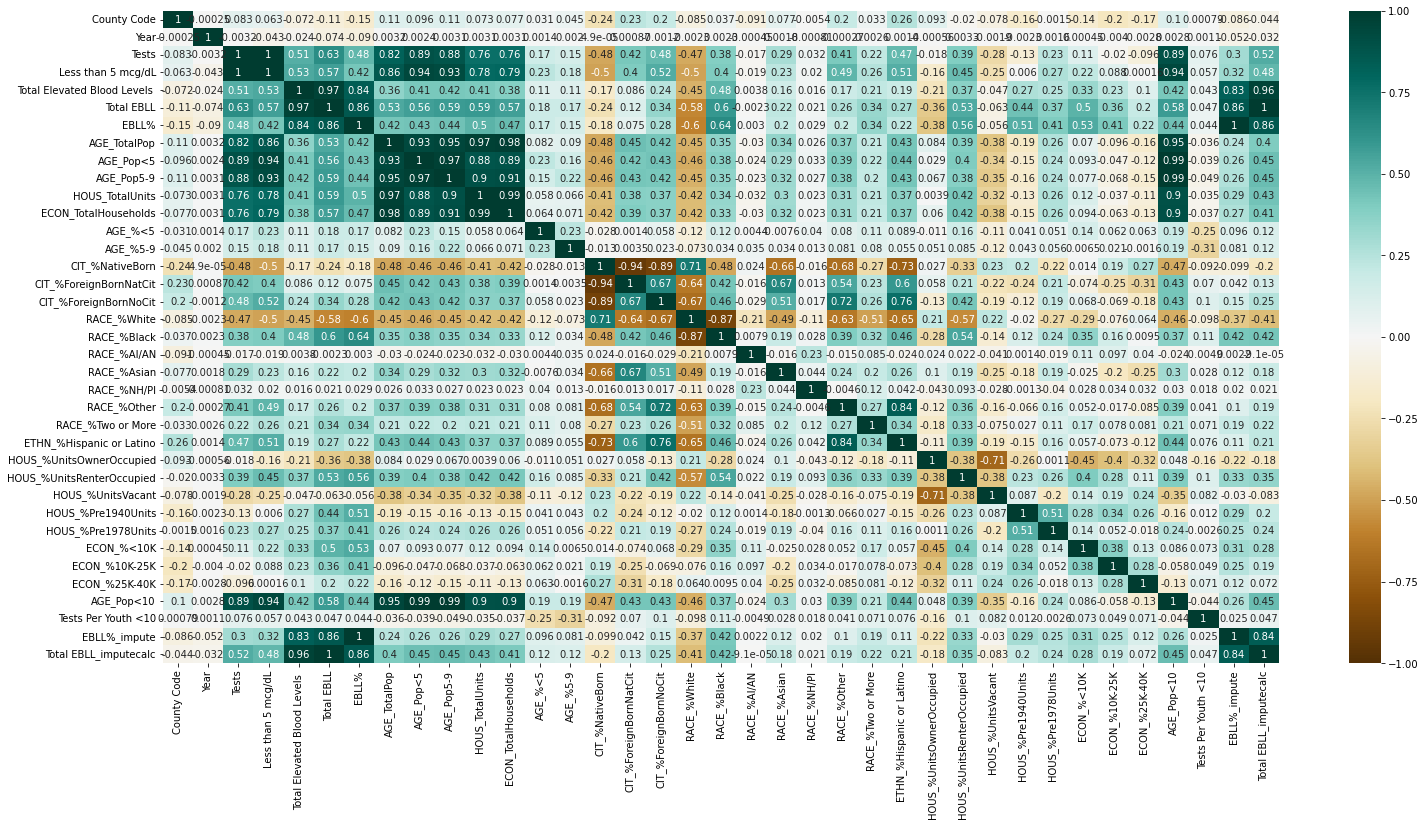

In [12]:
# Several of the EBLL Dataframe columns do not add much new information - we can likely drop most of the binning
# columns at this juncture

df_demog_ebll_merge = df_demog_ebll_merge.drop(columns=['5-10 mcg/dL',
                                                        '10 – 15 mcg/dL',
                                                        '15 + mcg/dL',
                                                        'Percent',
                                                        'Rate per 1,000'])
#county_comp_subset = df_demog_ebll_merge
plt.figure(figsize = (25,12))
heatmap = sns.heatmap(df_demog_ebll_merge.corr(),
                      vmin=-1,
                      vmax=1,
                      annot=True,
                      cmap='BrBG')

In [80]:
iter_preprocessor = IterativeImputer(max_iter=10,
                                     random_state=0,
                                     min_value=0)
feat_1 = np.array(df_demog_ebll_merge['EBLL%']).reshape(-1,1)
feat_2 = np.array(df_demog_ebll_merge['RACE_%White']).reshape(-1,1)
feat_3 = np.array(df_demog_ebll_merge['RACE_%Black']).reshape(-1,1)
feat_4 = np.array(df_demog_ebll_merge['ECON_%<10K']).reshape(-1,1)
feat_5 = np.array(df_demog_ebll_merge['HOUS_%Pre1978Units']).reshape(-1,1)
feat_6 = np.array(df_demog_ebll_merge['ECON_%25K-40K']).reshape(-1,1)
feat_7 = np.array(df_demog_ebll_merge['HOUS_%UnitsOwnerOccupied']).reshape(-1,1)
feat_8 = np.array(df_demog_ebll_merge['Year']).reshape(-1,1)
feat_9 = np.array(df_demog_ebll_merge['County Code']).reshape(-1,1)
feat_10 = np.array(df_demog_ebll_merge['Tests']).reshape(-1,1)
feat_11 = np.array(df_demog_ebll_merge['Tests Per Youth <10']).reshape(-1,1)
feature_set = (feat_1,feat_5,feat_6,feat_7,feat_8,feat_11)
X = np.hstack(feature_set)

iter_preprocessor.fit(X)
X_prep = iter_preprocessor.transform(X)

df_demog_ebll_merge['EBLL%_IterImpute'] = np.hsplit(X_prep,len(feature_set))[0].reshape(1,-1)[0]
df_demog_ebll_merge['Total EBLL_IterImputeCalc'] = df_demog_ebll_merge['Tests'] * df_demog_ebll_merge['EBLL%_IterImpute']
df_demog_ebll_merge.describe()

,County Code,Year,Tests,Less than 5 mcg/dL,Total Elevated Blood Levels,Total EBLL,EBLL%,AGE_TotalPop,AGE_Pop<5,AGE_Pop5-9,...,HOUS_%Pre1978Units,ECON_%<10K,ECON_%10K-25K,ECON_%25K-40K,AGE_Pop<10,Tests Per Youth <10,EBLL%_impute,Total EBLL_imputecalc,EBLL%_IterImpute,Total EBLL_IterImputeCalc
count,9337.000000,9337.000000,9337.000000,3837.000000,7399.000000,2984.000000,2984.000000,9337.000000,9337.000000,9337.000000,...,9337.000000,9337.000000,9337.000000,9337.000000,9337.000000,9337.000000,9337.000000,9337.000000,9337.000000,9337.000000
mean,63.516226,2017.496626,78.265931,99.339849,0.511691,4.557306,0.013937,8292.165685,453.886794,474.429367,...,0.597186,0.046245,0.127594,0.126627,928.316162,0.091084,0.013937,2.187691,0.017837,2.572261
std,36.377578,1.706010,146.824349,177.630823,3.097600,16.246676,0.043719,10975.718948,696.471976,685.661185,...,0.122878,0.036535,0.068139,0.057842,1372.528604,0.103235,0.024712,9.462063,0.028791,9.907459
min,1.000000,2015.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,0.000000,0.000000,...,0.067227,0.000000,0.000000,0.000000,2.000000,0.000112,0.000000,0.000000,0.000000,0.000000
25%,29.000000,2016.000000,7.000000,12.000000,0.000000,0.000000,0.000000,1541.000000,69.000000,71.000000,...,0.521833,0.022485,0.078571,0.087269,146.000000,0.052830,0.000000,0.000000,0.000000,0.000000
50%,65.000000,2017.000000,22.000000,27.000000,0.000000,0.000000,0.000000,3541.000000,177.000000,194.000000,...,0.594175,0.038743,0.124294,0.124853,367.000000,0.081754,0.013937,0.097562,0.008930,0.045381
75%,99.000000,2019.000000,80.000000,111.000000,0.000000,0.000000,0.000000,10438.000000,539.000000,579.000000,...,0.680508,0.062125,0.165194,0.158266,1152.000000,0.108225,0.013937,0.878056,0.026120,0.696762
max,123.000000,2020.000000,2294.000000,2260.000000,52.000000,208.000000,0.375000,75039.000000,8031.000000,7409.000000,...,1.000000,0.315789,0.588235,0.492308,15440.000000,3.833333,0.375000,207.993600,0.375000,207.993600


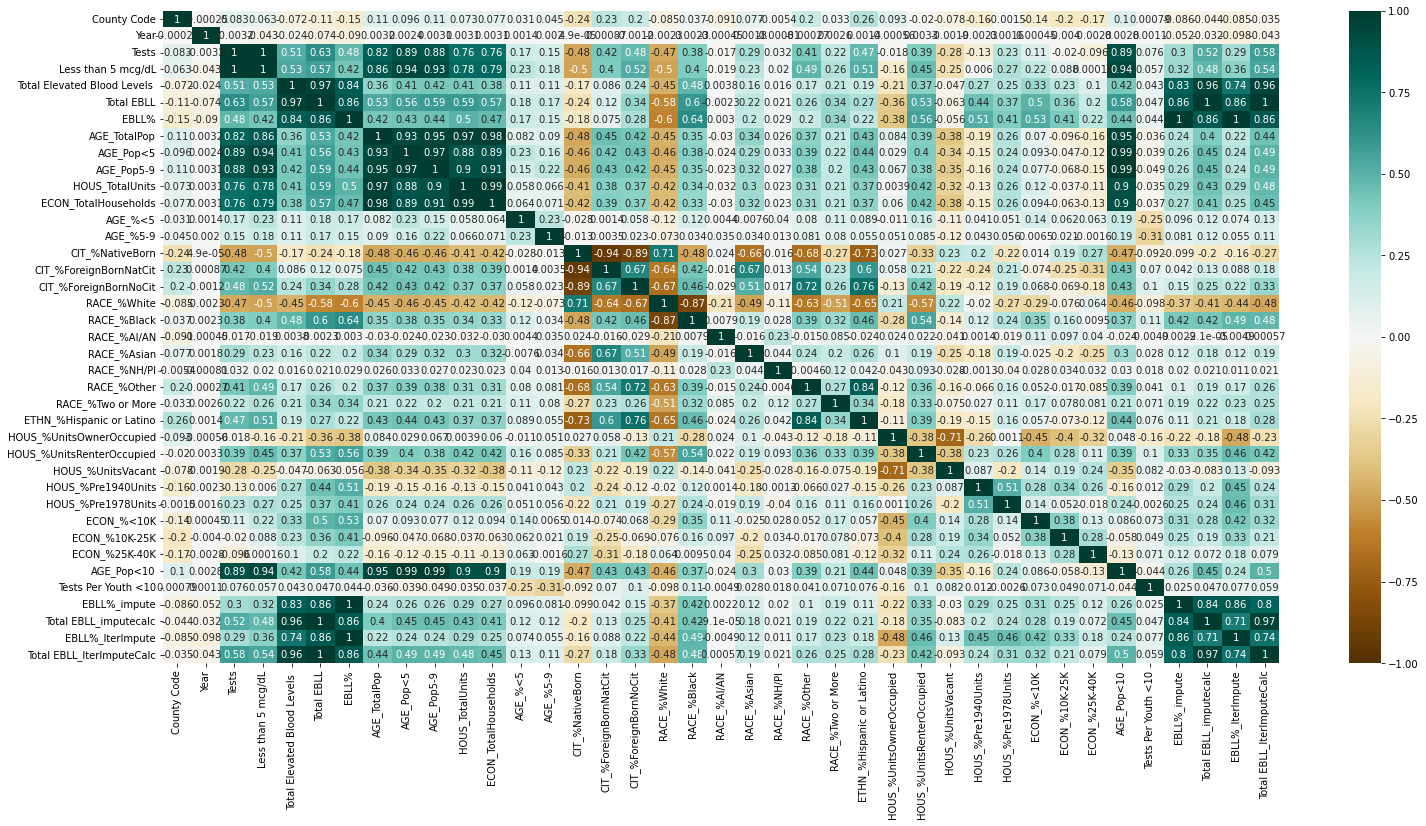

In [22]:
plt.figure(figsize = (25,12))
heatmap = sns.heatmap(df_demog_ebll_merge.corr(),
                      vmin=-1,
                      vmax=1,
                      annot=True,
                      cmap='BrBG')

In [81]:
nys_counties = df_demog_ebll_merge[['County','Year','Tests','Total EBLL_IterImputeCalc']]
nys_counties = nys_counties.pivot_table(index=['County','Year'],
                                       values=['Tests','Total EBLL_IterImputeCalc'],
                                       aggfunc=sum,
                                       fill_value=0)
nys_counties['Annual EBLL%'] = ''
nys_counties['Annual EBLL%'] = nys_counties['Total EBLL_IterImputeCalc']/nys_counties['Tests']
nys_counties = nys_counties.pivot_table(index=['County'],
                                       columns='Year',
                                       values='Annual EBLL%',
                                       fill_value=0)
# Adjust the 'by' value to change by which year the data is sorted
nys_counties = nys_counties.sort_values(by=2019,axis=0,ascending=False)
nys_counties_highlight = nys_counties.style.background_gradient(cmap='Greens')
nys_counties_highlight

Year,2015,2016,2017,2018,2019,2020
County,,,,,,
Oneida,0.092706,0.093561,0.102624,0.092503,0.070127,0.069828
Erie,0.095675,0.102631,0.083310,0.075407,0.069253,0.055818
Montgomery,0.087689,0.068579,0.078361,0.075122,0.062990,0.059674
Albany,0.059691,0.058424,0.061739,0.061252,0.062890,0.058033
Fulton,0.099698,0.090188,0.123994,0.086700,0.051960,0.084291
Cayuga,0.051443,0.026370,0.034878,0.051517,0.049336,0.034272
Onondaga,0.065956,0.058200,0.054349,0.051015,0.047858,0.034744
Hamilton,0.057983,0.041110,0.020468,0.046689,0.046895,0.044252
Chautauqua,0.062620,0.055582,0.067372,0.057342,0.043464,0.063787


In [82]:
nys_counties = df_demog_ebll_merge[['County','Year','Tests','Total EBLL_IterImputeCalc']]
nys_counties = nys_counties.pivot_table(index=['County','Year'],
                                       values=['Tests','Total EBLL_IterImputeCalc'],
                                       aggfunc=sum,
                                       fill_value=0)
nys_counties = nys_counties.pivot_table(index=['County'],
                                        columns='Year',
                                        values='Total EBLL_IterImputeCalc',
                                        aggfunc=sum,
                                        fill_value=0)
# Adjust the 'by' value to change by which year the data is sorted
nys_counties = nys_counties.sort_values(by=2019,axis=0,ascending=False)
nys_counties_highlight = nys_counties.style.background_gradient(cmap='Greens')
nys_counties_highlight

Year,2015,2016,2017,2018,2019,2020
County,,,,,,
Erie,943.162545,1121.143726,943.071694,811.906826,700.356327,607.742763
Westchester,446.334040,447.593049,373.816805,386.398489,314.166755,271.886465
Monroe,426.526534,449.707674,361.626690,261.445244,313.439052,266.488926
Onondaga,346.267897,304.268355,291.528427,271.397951,257.188798,204.153624
Nassau,376.947976,329.992680,279.632013,240.986487,214.731061,222.116360
Albany,169.881268,180.239404,186.144108,190.188101,192.381986,172.823713
Oneida,226.758256,241.106132,251.428208,243.559983,162.695137,162.698199
Suffolk,218.781513,237.680901,196.643906,170.306083,133.371194,132.585016
Rockland,86.706162,126.888555,96.812108,104.132294,111.429907,76.567441


In [70]:
county_input = df_demog_ebll_merge[df_demog_ebll_merge['County'] == 'Niagara']
county_input = county_input.reset_index(level=0)
county_input = county_input[['Year',
                             'ZIP Code',
                             'Tests',
                             'Total EBLL',
                             'EBLL%',
                             'Total EBLL_IterImputeCalc',
                             'EBLL%_IterImpute']].copy()
county_sort = county_input.pivot_table(index=['ZIP Code'],
                                       values=['EBLL%','EBLL%_IterImpute'],
                                       columns='Year',
                                       fill_value=0)
county_sort = county_sort.style.background_gradient(cmap='Reds')
county_sort